# Matplotlib

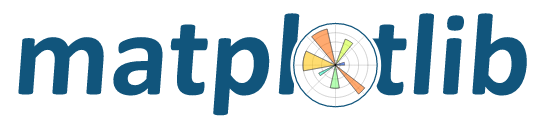

> 수정 2022.5.17

Matplot lib 세부 튜토리얼

> - [Matplotlib Tutorial - 파이썬으로 데이터 시각화하기, Wikidoc](https://wikidocs.net/book/5011)
> - https://wikidocs.net/92089
> - 효과적으로 matplotlib사용하기 [링크](http://pbpython.com/effective-matplotlib.html)
> - Matplotlib를 사용한 시각화 예제들을 보고 싶다면 Matplotlib [갤러리](http://matplotlib.org/gallery.html)를 방문하세요.
> - 데이터 사이언스 스쿨의 Matplotlib [소개](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/)

## 소개
Matplotlib는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지입니다.

주피터(Jupyter) 노트북을 사용하는 경우에는 다음처럼 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정해야 합니다.
```
%matplotlib inline
```

Plot 의 구조

Matplotlib의 그림은 Figure 객체, Axes 객체, Axis 객체 등으로 구성되어 있습니다. Figure 객체는 한 개 이상의 Axes 객체를 포함하고 Axes 객체는 다시 두 개 이상의 Axis 객체를 포함합니다. 말로 하면 이해하기 힘드니 그림으로 보겠습니다.

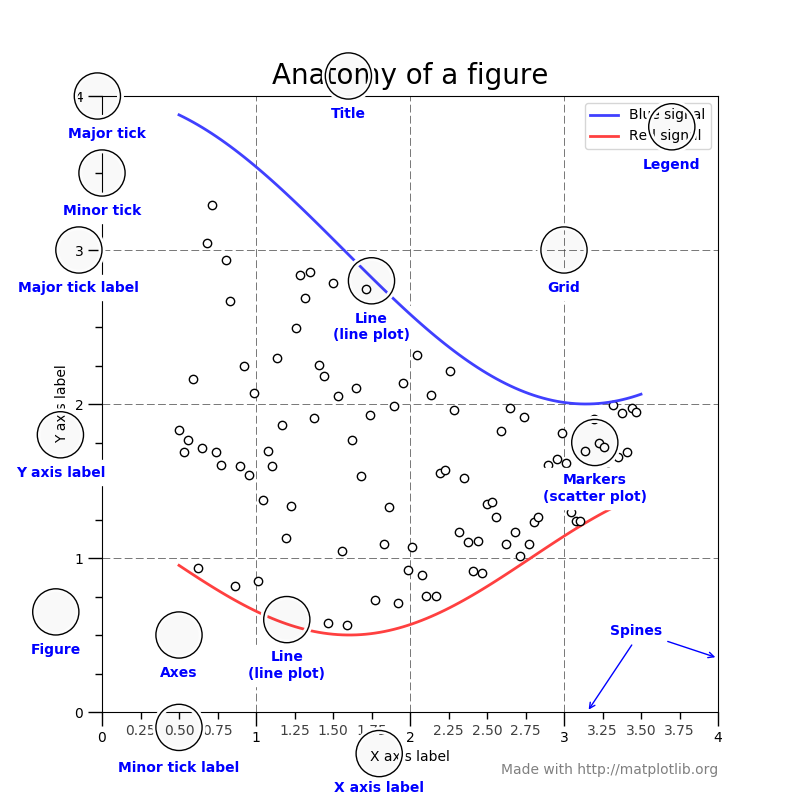

## 설치

```sh
pip install -U pip
pip install -U matplotlib
```

conda 설치

```sh
conda install -y matplotlib
```


In [2]:
! pip install matplotlib

     |████████████████████████████████| 11.2 MB 8.7 MB/s            
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-8.4.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached kiwisolver-1.3.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached fonttools-4.28.3-py3-none-any.whl (884 kB)


Figure는 그림이 그려지는 캔버스나 종이를 뜻하고 Axes는 하나의 그림, 그리고 Axis는 가로축이나 세로축 등의 축입니다.


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

### 한글 사용 (링크)

한글 사용은 아래 [한글 사용](#한글-사용) 을 참조

In [31]:
# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf


Text(0.5, 1.0, '한글 타이틀...')

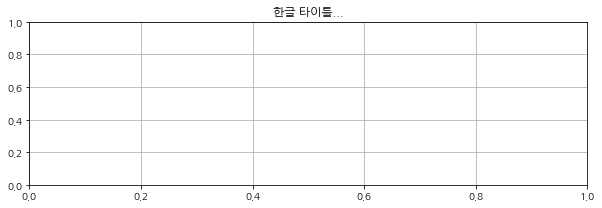

In [2]:
# 전역 폰트 설정 사용
# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
# plt.rc('font', family=fontname)
plt.rcParams["font.family"] = fontname
plt.rcParams["font.size"] = 12

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

# 단순 플롯

1. plt.plot()
1. plt.AAA 메서드

## `plot()`

```python
plot([x], y, [fmt], *, data=None, **kwargs)
plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
```

 - `ax.plot(x, y)`
 - `ax.plot(x, y)`
 - `ax.plot(x, y, kind='bar')`
 - `ax.plot(x, y, 'g--', marker='o')`

일차함수 데이터

In [10]:
# 데이터
np.random.seed(5)
x = np.arange(1, 101)
y = 20 + 3 * x + np.random.normal(0, 60, 100)

분포 그래프

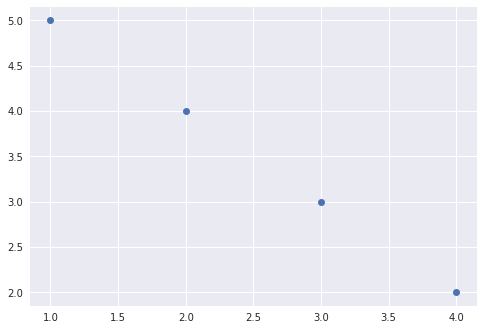

In [49]:
plt.plot(x, y, "o")
plt.show()

## Figure

Pyplot은 Figure-Axes->(X.Axis,Y.Axis) 로 구성되고, plot함수는 figure에 Axes 객체를 추가해 화면에 plot이 표시한다.
`plt.plot()` 함수가 자동으로 가장 최근에 생성된 Figure 객체를 찾고 해당 Figure 객체내의 AxesSubplot 객체에 그래프를 그린다.

선 그래프와 분포 그래프

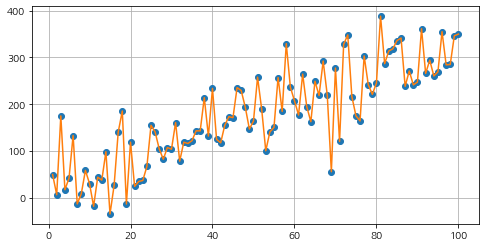

In [15]:
plt.figure(figsize=(8,4)) # 피겨 크기 

plt.plot(x, y, "o")
plt.plot(x, y, "-")
plt.show()

그래프 크기 조정

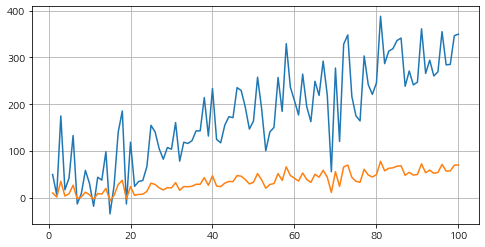

In [16]:
# 그래프 크기 설정
plt.figure(figsize=(8,4))
#plt.rcParams['figure.figsize'] = (6, 6)
 
plt.plot(x, y)
plt.plot(x, y*0.2, "-") # 포맷
plt.show()

# 메서드

## 산포도 `scatter()`

산점도는 2개의 연속형 변수 사이의 관계(영향력)을 보기위해 직교 좌표의 x, y 축에 관측점을 찍어서 만든다. x, y 좌표에 찍히는 점은 관측 값을 의미한다.
 - 나이와 소득에 대한 상호 관계를 나타낸다.

In [24]:
x[:5], y[:5]

(array([1, 2, 3, 4, 5]),
 array([ 49.47364921,   6.14779089, 174.84627122,  16.87447222,
         41.57659049]))

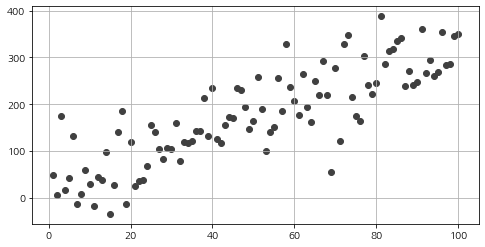

In [25]:
# 그래프 크기 설정
plt.figure(figsize=(8,4))
plt.scatter(x, y, color = '.25')
plt.show()

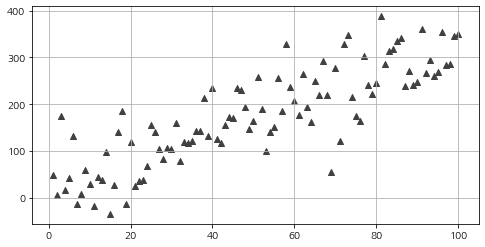

In [28]:
plt.figure(figsize=(8,4))
plt.scatter(x, y, marker='^', color = '.25')
plt.show()

## 히스토그램(Histogram)
히스토그램(histogram)은 표로 되어 있는 도수 분포를 정보 그림으로 나타낸 것이다. 더 간단하게 말하면, 도수분포표를 그래프로 나타낸 것이다

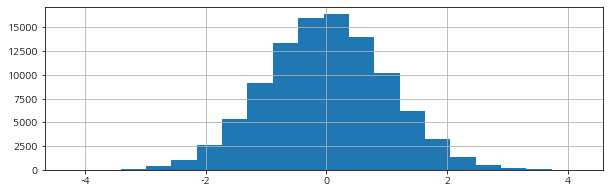

In [29]:
# 정규분포 데이터 x=0, y=5
x = np.random.randn(100000)
y = .4 * x + np.random.randn(100000) + 5

plt.hist(x, bins=20)
plt.show()

## 막대 그래프 (Bar graph)

In [4]:
x = np.arange(0, 10, 1)
y = np.random.randint(0, 10, 10)

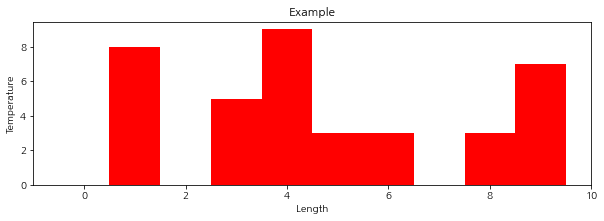

In [5]:
plt.bar(x, y, width=1.0, color='r')
plt.grid()
plt.xlabel('Length')
plt.ylabel('Temperature')
plt.title('Example')

plt.show()


## errorbar 에러바


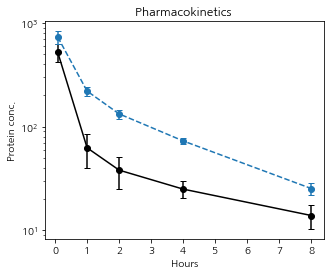

In [ ]:
# Data to draw
x = [0.083, 1, 2,4,8]
y = [523.11, 62.32, 37.93, 24.85, 13.81]
y2 = [733.31, 220.25, 132.63, 72.63, 25.17]
std = [101.62, 22.61, 13.00, 4.64, 3.56]


fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(5, 4))
# fig = plt.figure() # figure setting
# ax = fig.add_subplot(1,1,1) # Get the figure and the axes

#
ax.errorbar(x, y, std, fmt = "ko-" ,capsize= 3 ) # 에러바가 있는 선 그래프를 그려줍니다.
ax.errorbar(x, y2, std, fmt = "o--" ,capsize= 3  ) # 에러바가 있는 선 그래프를 그려줍니다.

# Label과 Title을 정해줍니다.
ax.set(title='Pharmacokinetics ', xlabel='Hours', ylabel='Protein conc.')
# Y축을 log로 바꾸어 줍니다. 
ax.set_yscale('log')
plt.show()

두가지 그룹 (group1, group2)에 각각 (E7, E8, E9, E10) 샘플이 있고 여러번 값을 측정하여 표준편차를 에러바로 표시

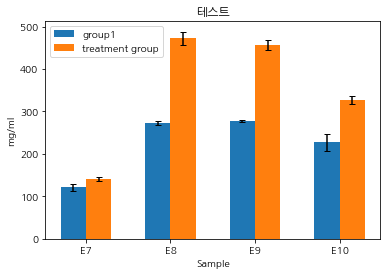

In [2]:
# number of data in each group
n_groups = 4

# 각 데이터의 평균
means_group1 = (121.32, 272.88, 277.08, 227.03)
means_group2 = (141.21, 472.15, 457.01, 327.34)

# 각 데이터의 표준편차
std_group1 = (8.0, 5.8, 2.0, 19.9)
std_group2 = (5.0, 15.8, 12.0, 9.1)
index = np.arange(n_groups)
bar_width = 0.3 # space between bar

rects2 = plt.bar(index, means_group1, bar_width,
                    #color='r' , # color of bar
                    yerr=std_group1, # error bar
                    capsize=3, # cap length for error bar
                    ecolor='k', # color of error bar
                    label='group1')

rects2 = plt.bar(index + bar_width, means_group2, bar_width,
                    #color='b', # color of bar
                    yerr=std_group2, # error bar
                    capsize=3, # cap length for error bar
                    ecolor='k', # color of error bar
                    label='treatment group')

plt.xlabel('Sample') # x축 이름
plt.ylabel('mg/ml') # y축 이름
plt.title('테스트') # 그래프 이름
plt.xticks(index + bar_width/2, ('E7', 'E8', 'E9', 'E10')) # x축 틱
plt.legend() # 레전드 표시
plt.show()

## 겹친 막대 그래프

<BarContainer object of 4 artists>

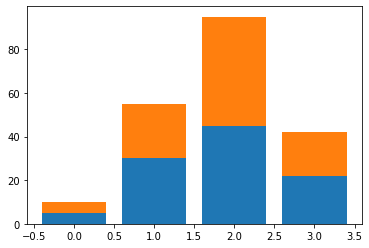

In [3]:

A = [5., 30., 45., 22.]
B = [5., 25., 50., 20.]

X= range(4)
plt.bar(X, A )
plt.bar(X, B, bottom = A)

## 수평 막대 그래프


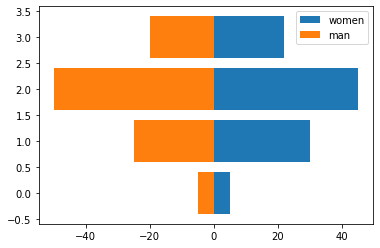

In [4]:

women_pop = np.array([5., 30., 45., 22.])
men_pop = np.array([5.,25.,50.,20.])
X = np.arange(4)

plt.barh(X, women_pop, label = 'women')
plt.barh(X, -men_pop, label = 'man')
plt.legend()

## 박스 그래프(Box plot)

정확한 명칭은 box-and-whisker plot입니다. 통계학적으로 유용한 여러값을 한번에 시각화 해줍니다.

- 중앙값(Median)
- 박스(Box): 25~75%의 값을 표현, 가장 아래가 Q1이고 가장 위가 Q3입니다.
- 수염(Whiskers): 박스의 위아래로 Q1~Q3으로 부터 1.5배 내에 있는 가장 떨어진 데이터
- 이상치(Outlier): 수염보다 멀리있는 값

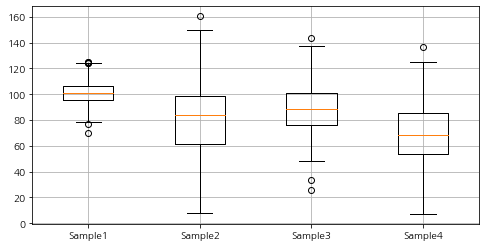

In [12]:
## Create data
np.random.seed(10)
collectn_1 = np.random.normal(100, 10, 200)
collectn_2 = np.random.normal(80, 30, 200)
collectn_3 = np.random.normal(90, 20, 200)
collectn_4 = np.random.normal(70, 25, 200)

## combine these different collections into a list    
data = [collectn_1, collectn_2, collectn_3, collectn_4]

fig1, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 4))

# plotting
ax.boxplot(data)

## Custom x-axis labels
ax.set_xticklabels(['Sample1', 'Sample2', 'Sample3', 'Sample4'])
plt.show()

정규분포를 가진 데이터

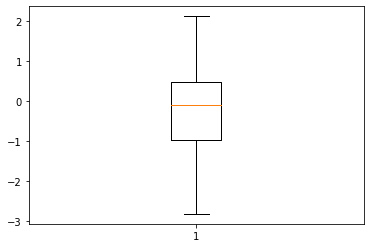

In [8]:
data = np.random.randn(100)
#정규분포에서 얻은 100개의 값을 생성
plt.boxplot(data)
#값 집합을 취한후, 자체에서 평균값, 중앙값과 다른 통계수량을 계산한다.
plt.show()
#빨간 막대는 평균값, 파란상자는 제 1사분위수부터 제 3사분위수까지의 데이터의 절반을 포함한다 = 데이터평균값의 중심이다.

## triplot

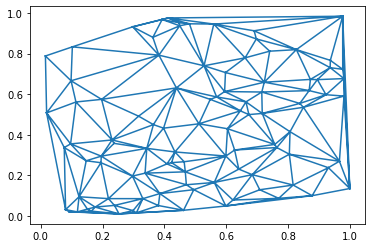

In [11]:
import matplotlib.tri as tri

data = np.random.rand(100,2)

triangles = tri.Triangulation(data[:,0],data[:,1])

plt.triplot(triangles)

## colorbar

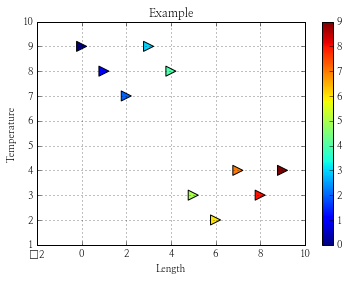

In [68]:
# colormap을 bar로 표시

colormap = t
# s:size, c: colormap
plt.scatter(t, y, s=100, c = colormap, marker='>')
plt.grid()
plt.colorbar()
plt.xlabel('Length')
plt.ylabel('Temperature')
plt.title('Example')

plt.show()

## Legend 표시

```
# legend: Location String	Location Code
#‘best’	0
#‘upper right’	1
#‘upper left’	2
#‘lower left’	3
#‘lower right’	4
#‘right’	5
#‘center left’	6
#‘center right’	7
#‘lower center’	8
#‘upper center’	9
#‘center’	10
```

그래프의 요소에 대한 범례(legend)를 `legend()` 로 지시할 수 있다.

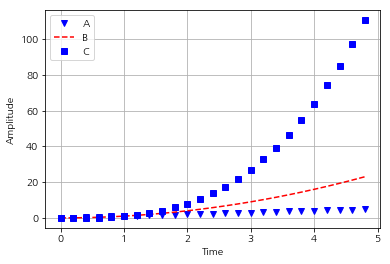

In [39]:
plt.plot(t, t,'bv', label='A')
plt.plot(t, t**2, 'r--', label='B')
plt.plot(t, t**3, 'bs', label='C')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

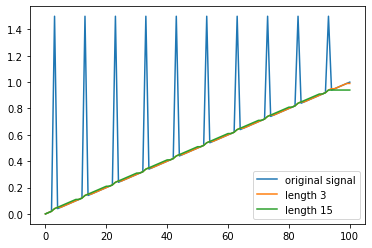

In [24]:
import scipy.signal as signal
x = np.linspace (0, 1, 101) # get some linear data
x[3::10] = 1.5 # add some noisy signal
plt.plot(x)
plt.plot(signal.medfilt(x,3))
plt.plot(signal.medfilt(x,15))
plt.legend(['original signal', 'length 3','length 15'])

# 축조정 

# 컬러와 스타일 사용자 정의


## styles

그래프틔 테마를 지정할 수 있다.

https://matplotlib.org/stable/api/style_api.html

`matplotlib.style.available` 로 사용할 수 있는 플로팅의 스타일을 알수 있다.

In [47]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

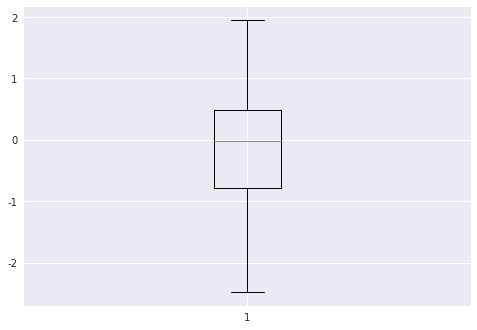

In [48]:
plt.style.use('seaborn') # 'ggplot' seaborn

data = np.random.randn(100)
#정규분포에서 얻은 100개의 값을 생성
plt.boxplot(data)
#값 집합을 취한후, 자체에서 평균값, 중앙값과 다른 통계수량을 계산한다.
plt.show()
#빨간 막대는 평균값, 파란상자는 제 1사분위수부터 제 3사분위수까지의 데이터의 절반을 포함한다 = 데이터평균값의 중심이다.

## colors

In [ ]:
import matplotlib
matplotlib.colors.cnames

In [23]:
def f2(x,w):
    return (x - w) * x * (x + 2) # (A) 함수 정의

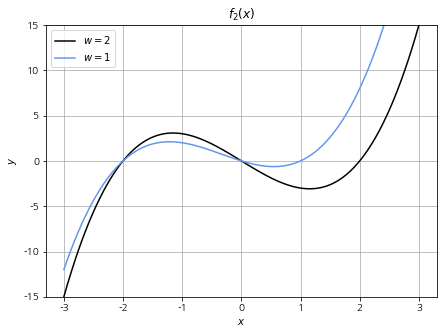

In [26]:
# x를 정의
x = np.linspace(-3, 3, 100)

plt.figure(figsize=(7, 5))
#차트 묘사
plt.plot(x, f2(x,2), color='black', label='$w=2$')
plt.plot(x, f2(x,1), color='cornflowerblue', label='$w=1$')

plt.legend(loc = "upper left") # 범례 표시
plt.ylim(-15, 15)    # y축의 범위
plt.title('$f_2(x)$')  # 제목
plt.xlabel('$x$')     # x 라벨
plt.ylabel('$y$')     # y 라벨
plt.grid(True)       # 그리드
plt.show()

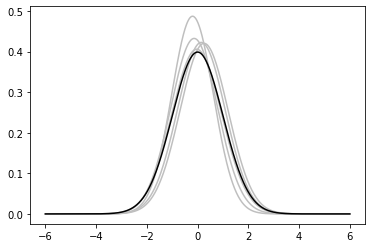

In [12]:
def pdf(X, mu, sigma):
    a = 1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma **2)
    return a * np.exp(b* (X - mu)**2)

X = np.linspace(-6,6,1000)

for i in range(5):
    samples = np.random.standard_normal(50) #50개의 표본 집합을 5개 생성
    mu, sigma = np.mean(samples), np.std(samples) 
    plt.plot(X, pdf(X, mu, sigma), color = '.75')

plt.plot(X, pdf(X, 0., 1.), color = 'k')

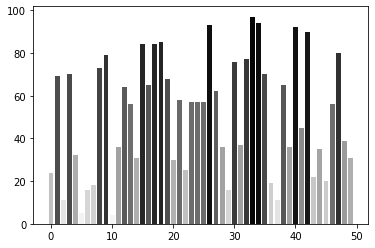

In [16]:
import matplotlib.cm as cm
import matplotlib.colors as col

values = np.random.randint(99, size = 50)
cmap = cm.ScalarMappable(col.Normalize(0,99), cm.binary)

plt.bar(np.arange(len(values)), values, color = cmap.to_rgba(values))
plt.show()
#높이에 따라 색이 진해짐

## linestyle


`linestyle=` 혹은 marker+linestyle 마커 문자로 선의 종류를 지정할 수 있다.

라인 스타일은 [pyplot.plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) 에서 확인할 수 있다.

다음은 200ms 간격의 시간 샘플을 생성해서 1배, 2배, 3배 증폭한 신호의 마커를 달리해서 보여주고 있다.

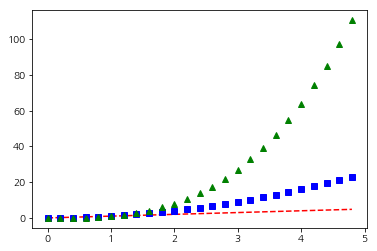

In [43]:
t = np.arange(0., 5., 0.2)

# red dash, blue square, gree triangl
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

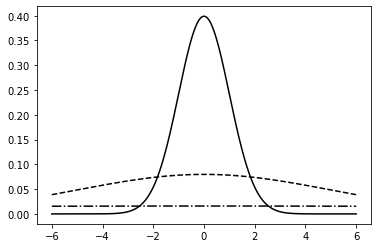

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def pdf(X, mu, sigma):
    a = 1. / (sigma * np.sqrt(2. * np.pi))
    b = -1. / (2. * sigma **2)
    return a * np.exp(b* (X - mu)**2)

X = np.linspace(-6,6,1024)
plt.plot(X, pdf(X,0.,1.),color='k', linestyle = 'solid')

plt.plot(X, pdf(X,0.,5.),color='k', linestyle = 'dashed')

plt.plot(X, pdf(X,0.,25.),color='k', linestyle = 'dashdot')

## Colors, Markers, and Line Styles

plot 라인의 마커와 색상
 - `ax.plot(x, y, 'g--', marker='o')`
 - `ax.plot(x, y, linestyle='--', color='g', marker='o')`

color:
 - b: blue
 - g: green
 - r: red
 - c: cyan
 - m: magenta
 - y: yellow
 - k: black
 - w: white
 
linestyle:

`linestyle=` 혹은 marker+linestyle 마커 문자로 선의 종류를 지정할 수 있다. 라인 스타일은 [pyplot.plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) 에서 확인할 수 있다.

 - '-', '--', 'dashed', 


### Marker 이용

그래프의 색을 지시하기 위해 매쓰랩 형식의 마커 기호를 사용할 수 있다.
 - http://matplotlib.org/api/markers_api.html#module-matplotlib.markers
 - 마커 색상은 http://matplotlib.org/api/colors_api.html 를 따른다.

다음 두 형식를 사용한다.  marker= 를 생략하면 선을 생략하고 그려준다.

```python
plot(..., marker='o')
plot(x, y,'o')
```


대표적인 마커는,

```python
 - b: blue
 - g: green
 - r: red
 - c: cyan
 - m: magenta
 - y: yellow
 - k: black
 - w: white
 - D: diamond
 - p: pentagon
```



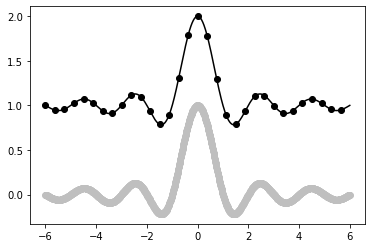

In [18]:
X = np.linspace(-6, 6, 1024)
Y1 = np.sinc(X)
Y2 = np.sinc(X) +1

plt.plot(X,Y1, marker ='o', color = '.75')
plt.plot(X, Y2, marker = 'o', color ='k', markevery = 32)
plt.show()

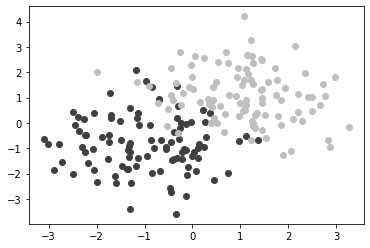

In [13]:
A = np.random.standard_normal((100,2))
A += np.array((-1,-1))

B = np.random.standard_normal((100,2))
B += np.array((1,1))

plt.scatter(A[:,0],A[:,1], color = '.25')
plt.scatter(B[:,0],B[:,1], color = '.75')

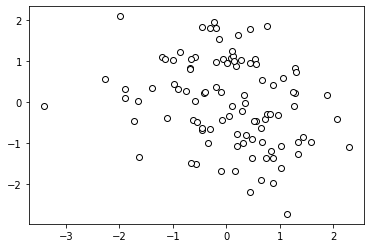

In [15]:
data = np.random.standard_normal((100,2))

plt.scatter(data[:,0],data[:,1],color ='1.0',edgecolor = '0.0')


## `axis()`

[pyplot.axis](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.axis) 를 사용해서 축 사이의 조정을 할 수 있다. axis()는x축 범위와 y축 범위 값을 튜플로 가지고 있다., 

```python
pyplot.axis(*v, **kwargs) 
 -  v = [xmin, xmax, ymin, ymax]
 - kwargs : Axis properties (off, equal, scaled, tight, image, auto, normal )
```

(0.0, 1.0, 0.0, 1.0)

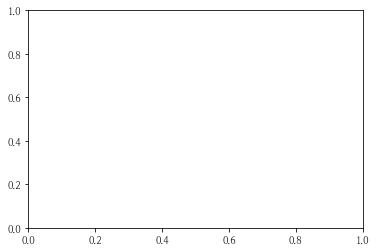

In [50]:
plt.axis()

라인 스타일을 둥근원 형태로 주고 `plt.axis()` 로 표시할 축을 지시하면 

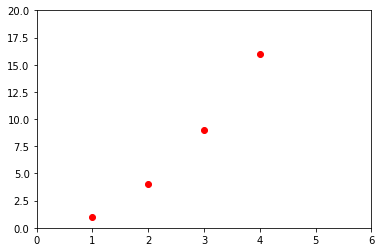

In [14]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

## xticks

두개 이상의 데이터 표현, 오른쪽에 표현할 바는 x축 좌표값을 적절히 준다.
 - pyplot.xticks()


https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

In [ ]:
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.

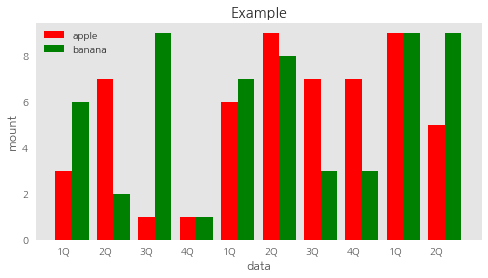

In [49]:
t = np.arange(0, 10, 1)
y = np.random.randint(0, 10, 10)
y1 = np.random.randint(1,10, 10)#np.array([3,2,4,3,4,9,8,7,9,8])

plt.figure(figsize=(8,4))
plt.bar(t, y, width=0.4, color='r', label='apple')
plt.bar(t + 0.4, y1, color='g', width=0.4, label='banana')
plt.grid()
plt.xlabel('data')
plt.ylabel('mount')
plt.title('Example')
# Ticks
plt.xticks(t, ('1Q','2Q','3Q','4Q','1Q','2Q','3Q','4Q','1Q','2Q'))
plt.legend()
plt.show()

## xlim(), ylim()
 - x,y 축 값의 범위를 지정할 수 있다.

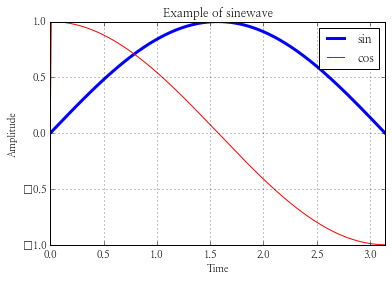

In [27]:
plt.plot(t, y, lw=3, label='sin')
plt.plot(t, dy, 'r', label='cos')
plt.legend() # 범례Legend 표시
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.xlim(0, 3.14)
#plt.ylim(-1.2, 1.2)
plt.show()

## 라인굵기: `linewidth` or `lw`

plot()에 `linewidth=` 혹은 `lw=` 매개변수로 선의 굵기를 지정할 수 있다.

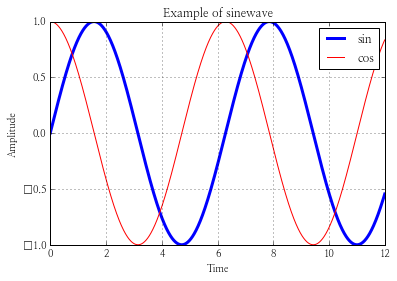

In [25]:
plt.plot(t, y, lw=3, label='sin')
# 색상 지정
plt.plot(t, dy, 'r', label='cos')
plt.legend() # 범례Legend 표시
plt.grid()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

# 그래프 위에 텍스트

 -https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples

### 텍스트 폰트를 지정 방법

matplotlib에서 폰트를 지정하여 출력하는 하는 대표적인 방법은 크기 두 가지

1. 텍스트 출력시 폰트 특성을 지정: FontProperties 속성으로 폰트 속성을 지정
1. 전역으로 지정: rcParams 을 사용하여 전역으로 설정값을 지정

텍스트를 출력하는 다음 함수들을 사용할 때, fontproperties 인자에 폰트를 지정할 수 있다.

matplotlib.pyplot
* title()
* xlabel()
* ylabel()
* legend()
* text()

matplotlib.axes 
* set_title()

예를 들어, 다음과 같이 텍스트와 폰트를 지정하여 출력할 수 있다.
* plt.text(0, 0, "Sample Text", fontproperties=fontprop)

### `text()`

```python
matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=False, **kwargs)
 -  좌표 x,y 에 텍스트 s 출력하기
```


### **`figtext()`**

[figtext()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figtext.html) 를 사용하면 figure 에 텍스트를 추가할 수 있다. 의미데로 figure의 좌표계를 사용하고 x, y 좌표는 0~1 사이 실수값이다. kwargs 인자로 폰트, 위치 등을 줄 수 있다.

```
figtext(x, y, s, *args, **kwargs)
```

시간별 온도 변화를 그려보자

### `annotate()` 사용

차트의 축에 텍스트 값을 넣을 수 있다.

 - https://matplotlib.org/stable/tutorials/text/annotations.html?highlight=anotate

[axis.annotate()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate)  메서드

```python
Axes.annotate(self, text, xy, *args, **kwargs)
```

###  Annotating Text
 plot 결과에 텍스트 추가

```python
matplotlib.pyplot.annotate(*args, **kwargs)
annotate(s, xy, xytext=None, xycoords='data', textcoords='data', arrowprops=None, **kwargs)
```


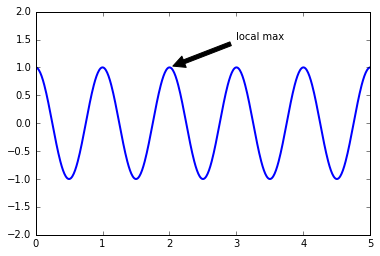

In [11]:
a = plt.subplot(111) # subplot(1,1,1)
t = np.arange(0.,5.,.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)
plt.annotate('local max', xy=(2,1), xytext=(3,1.5), arrowprops=dict(facecolor='black', shrink=0.05),)
plt.ylim(-2,2)
plt.show()

### text plot

Text(-0.5, -0.25, 'Bracjmard')

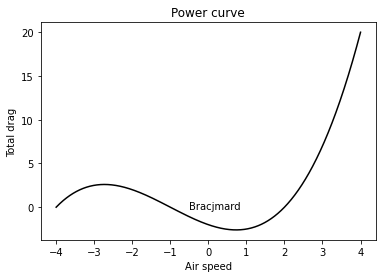

In [19]:

X = np.linspace(-4,4,1024)
Y = .25*(X+4.)*(X+1.)*(X-2.)

plt.title('Power curve')
plt.xlabel('Air speed')
plt.ylabel('Total drag')
plt.plot(X,Y, c='k')
plt.text(-0.5,-0.25, 'Bracjmard')

(-0.75, 15.75, -0.8, 16.8)

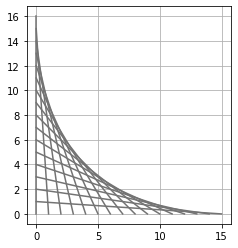

In [20]:
N = 16
for i in range(N):
    plt.gca().add_line(plt.Line2D((0,i),(N-i,0), color = '.45'))
    #Line2d 함수는 새로운 16개의 독립적인 선을 그린다.
plt.grid(True)
plt.axis('scaled')

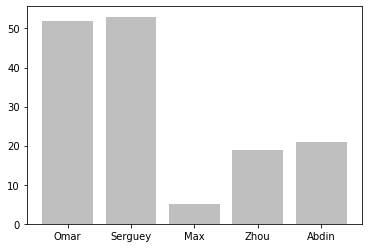

In [21]:
import matplotlib.ticker as ticker
name_list = ('Omar', 'Serguey', 'Max', 'Zhou', 'Abdin')
value_list = np.random.randint(0,99,size = len(name_list))
pos_list = np.arange(len(name_list))

ax = plt.axes()
ax.xaxis.set_major_locator(ticker.FixedLocator((pos_list)))
ax.xaxis.set_major_formatter(ticker.FixedFormatter((name_list)))

plt.bar(pos_list, value_list, color = '.75', align = 'center')
plt.show()
# 눈금의 위치를 생성하는 ticker.locater를 보았다. ticker.formatter 객체 인스턴스는 눈금용 레이블을 생성한다.
# 여기서 사용했던 formatter 인스턴스는 fixedformatter이며 문자열 목록에서 레이블을 가져온다 


### 범례와 주석

범례와 주석은 데이터 그림을 명확하고 상황에 맞게 설명합니다. 각 플롯에 데이터를 나타내는 간단한 설명을 할당함으로써, 우리는 독자의 머릿속에서 더 쉬운 멘탈 모델을 가능하게 하고 있다. 이 요리법에서는 그림의 특정 지점에 주석을 다는 방법과 데이터 범례를 만들고 배치하는 방법을 보여 줍니다.

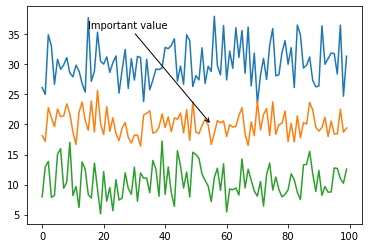

In [23]:
x1 = np.random.normal(30, 3, 100)
x2 = np.random.normal(20, 2, 100)
x3 = np.random.normal(10, 3, 100)

plt.plot(x1, label='plot')
plt.plot(x2, label='2nd plot')
plt.plot(x3, label='last plot')
# annotate an important value
plt.annotate("Important value", (55,20), xycoords='data',
         xytext=(15, 36),
         arrowprops=dict(arrowstyle='->'))
plt.show()

# Subplots

한 화면에 여러개의 그래프를 표시하기 위해 subplot 을 이용한다. 크게 3가지 방법.


```python
ax = fig.add_subplot(1, 1, 1)
fig, axes = plt.subplots(nrows,ncols)
plt.subplot(row+col+index)
```

### `plt.subplot(row+col+index)`

한 figure에 여러 subplot을 추가할 수 있다.

```python
plt.subplot(row+col+index)
```

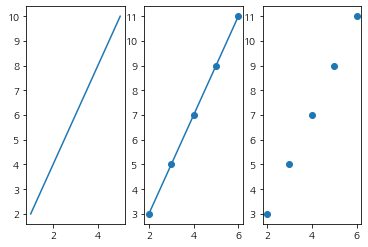

In [22]:
x = np.arange(1,6)
y = np.arange(2, 12, 2)

plt.subplot(131)
plt.plot(x, y)

plt.subplot(132)
plt.plot(x+1,y+1,  'o-')

plt.subplot(133)
plt.plot(x+1,y+1, 'o')

plt.show()

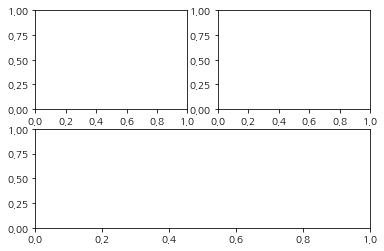

In [23]:
fig = plt.figure(figsize=(6,4))
plt.subplot(221)   #2x2 크기 1번 공간
plt.subplot(222)    #2x2 크기 2번 공간
plt.subplot(212) # 2x1 크기, 아래 표시하기 위해 2번째

plt.show()

### `plt.subplots()`

`subplots()`를 사용하면 Firure 객체와 AxesSubplot 객체 리스트를 생성한다.

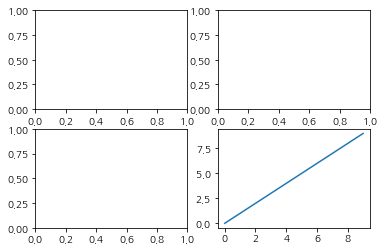

In [25]:
fig, ax_list = plt.subplots(2,2)     #2x2그리드 형태의 AxesSubplot 객체를 생성

# 반환된 AxesSubplot 리스트의 요소인 AxeSubplot 객체에 plot()으로 사용한다.
ax_list[1][1].plot(range(0,10))
plt.show()

Text(0.5, 0.98, 'TEST')

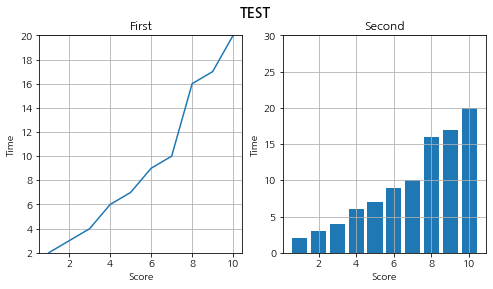

In [44]:
# 그래프를 그릴 X, Y 값을 입력합니다.
x = [1,2,3,4,5,6,7,8,9,10]
y = [2,3,4,6,7,9,10,16,17,20]

# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(8, 4))

# 첫번째 그래프
ax0.plot(x,y) # 선 그래프
ax0.set_ylim([2,20]) # y축의 값을 지정
ax0.set(title='First', xlabel='Score', ylabel='Time')

# 두번째 그래프
ax1.bar(x,y) # 막대 그래프
ax1.set_ylim([0,30])
ax1.set(title='Second', xlabel='Score', ylabel='Time')

# Title the figure
fig.suptitle('TEST', fontsize=14, fontweight='bold')

<Figure size 864x864 with 0 Axes>

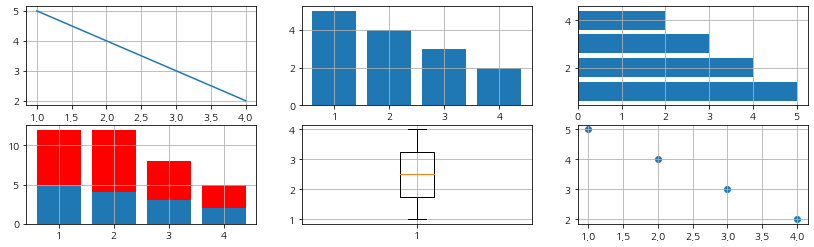

In [45]:
x = [1,2,3,4]
y = [5,4,3,2]

plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.5, hspace=0.5) # 그래프의 간격을 지정

# 3x2 크기
fig, ax = plt.subplots(ncols = 3, nrows = 2)

ax[0,0].plot(x, y)
ax[0,1].bar(x, y)
ax[0,2].barh(x, y)
ax[1,0].bar(x, y)
y1 = [7,8,5,3] # we need more data for stacked bar charts
ax[1,0].bar(x, y1, bottom=y, color = 'r')
ax[1,1].boxplot(x)
ax[1,2].scatter(x,y)

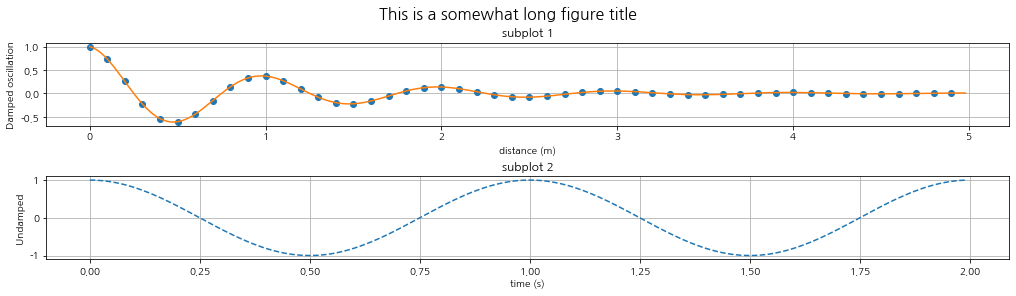

In [46]:
# AxesSubplot 객체
# figure 객체

def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1 * e1

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)


fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(t1, f(t1), 'o', t2, f(t2), '-')
axs[0].set_title('subplot 1')
axs[0].set_xlabel('distance (m)')
axs[0].set_ylabel('Damped oscillation')
fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].plot(t3, np.cos(2*np.pi*t3), '--')
axs[1].set_xlabel('time (s)')
axs[1].set_title('subplot 2')
axs[1].set_ylabel('Undamped')

plt.show()

### `figure.add_subplot()`

기존 figure 에 서브플롯을 추가한다.

```python
figure.add_subplot(row,col,index)
```
 - 반환: Axis 객체

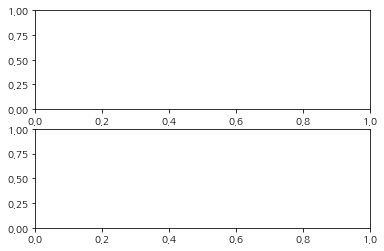

In [24]:
# plot의 Figure 객체를 생성해 subplot을 추가한다.
fig = plt.figure()
sub = fig.add_subplot(2, 1, 1) #subplot: (row, col, index)
sub = fig.add_subplot(2, 1, 2)
plt.show()

# Image 사용 (링크)

https://berkeley-stat159-f17.github.io/stat159-f17/lectures/10-matplotlib_beyond_basics/image_tutorial..html

# 한글 사용

- 사용가능한 폰트 확인, TTF 폰트 설치 방법
- matplotlib 텍스트 출력시 폰트 특성을 지정 (FontProperties)
- matplotlib 전역으로 한글 글꼴 지정(rcParams)

### 무료 한글폰트
* https://brunch.co.kr/@jade/203 저작권 걱정없는 무료 한글폰트

## 폰트를 추가하기

1. .ttf 폰트를 matplotlib으로 복사한다 <br>(가상환경의 Python 아래 site-package )
```bash
PYTHON\site-packages\matplotlib\mpl-data\fonts\ttffonts\ttf
```

1. matplotlib cache 폴더의 내용 삭제한다
1. 커널 재시작(주피터 노트북 재시작)

### 우분투 nanum 폰트 설치

1. 폰트 설치

```sh
! apt-get install fonts-nanum*
! apt-get install fontconfig
```

폰트 확인

```sh
!ls -l /usr/share/fonts/truetype/
```

2. 폰트 캐시 생성

```
!fc-cache -fv
```


3. matplotlib에 남아있는 font 캐시 삭제

```
!rm -rf ~/.cache/matplotlib/*
```

4. Jupyter server를 재시작한다.




#### 폰트 설치후 폰트 캐시 재설정

```
!ls -l /usr/share/fonts/truetype/
```

1. 폰트를 설치하고 폰트 캐시 생성

```
!fc-cache -fv
```


2. matplotlib에 남아있는 font 캐시 삭제

```
!rm -rf ~/.cache/matplotlib/*
```

3. Jupyter server를 재시작한다.

In [ ]:
# matplotlib에 남아있는 font 캐시 삭제
# ! rm -rf /home/qkboo/.cache/matplotlib/*

In [ ]:
# 폰트 캐시 생성
# !fc-cache -fv

In [16]:
# 참고) matplotlib cache 위치를  확인하는 방법

matplotlib.get_cachedir()

'C:\\Users\\Seung-June\\.matplotlib'

In [17]:
# matplotlib 설정 파일의 위치

matplotlib.matplotlib_fname()

'C:\\Users\\Seung-June\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

Text(0.5, 1.0, '한글 테스트')

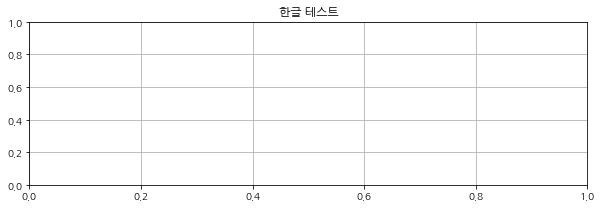

In [33]:
import matplotlib.pyplot as plt

# plt.rcParams["axes.grid"] = True
# plt.rcParams["figure.figsize"] = (14,4)
plt.title('한글 테스트')

### 폰트 찾기

In [31]:
# 폰트 목록에서 폰트 찾기
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumGothicCoding /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf


In [32]:
# 사용가능한 시스템의 TTF 폰트 목록
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] # 목록에서 처음 10 개만 보기

사용가능한 TTF 폰트 개수: 200


['/usr/share/fonts/truetype/lato/Lato-Hairline.ttf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmromancaps10-oblique.otf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrebonum-bold.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmsans12-oblique.otf',
 '/usr/share/fonts/opentype/urw-base35/NimbusSans-BoldItalic.otf',
 '/usr/share/texmf/fonts/opentype/public/lm/lmmono12-regular.otf',
 '/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyretermes-bold.otf',
 '/usr/share/texmf/fonts/opentype/public/tex-gyre/texgyrepagella-regular.otf']

## 사용법 1: 전역 설정 사용하기

`plt.rcParams[]` 속성에 폰트관련 지정.


### `matplotlib.rcParams[]`

matplotlib.rcParams을 통해 matplotlib의 다양한 설정값을 읽거나 지정할 수 있다.

https://matplotlib.org/users/customizing.html


```python
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('default')

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

plt.rcParams['axes.unicode_minus'] = False # 유니코드 부호표시 깨지지 않게
plt.rcParams["axes.formatter.useoffset"] = False # 과학표시(10승수) 사용하지 않게
plt.rcParams["axes.formatter.limits"] = -10000, 10000 # 과학표시(10승수) 사용하지 않게
```


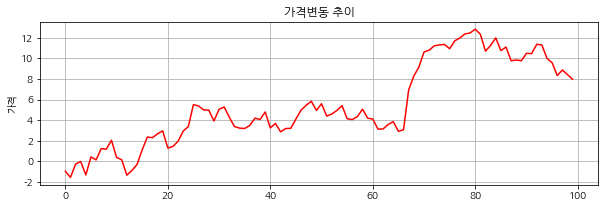

In [37]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# font_path = 'C:/Windows/Fonts/malgun.ttf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
# plt.rc('font', family=fontname)
plt.rcParams["font.family"] = fontname

prices = np.random.randn(100).cumsum()

plt.ylabel('가격')
plt.title('가격변동 추이')
plt.plot(range(100), prices, 'r')
plt.show()

Text(0.5, 1.0, '한글 테스트')

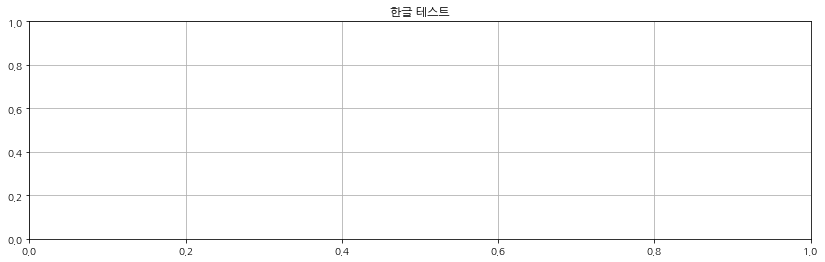

In [43]:
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

# matplotlib 한글 출력 확인용 테스트
plt.rcParams["font.family"] = 'NanumGothic'
plt.title('한글 테스트')

In [10]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print (plt.rcParams['font.size'] ) 
print (plt.rcParams['font.family'] )

10.0
['sans-serif']


In [11]:
# serif, sans-serif, monospace
print (plt.rcParams['font.serif']) 
print (plt.rcParams['font.sans-serif']) 
print (plt.rcParams['font.monospace']) 

['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']


폰트의 기본값들을 다음과 같이 설정할 수 있다

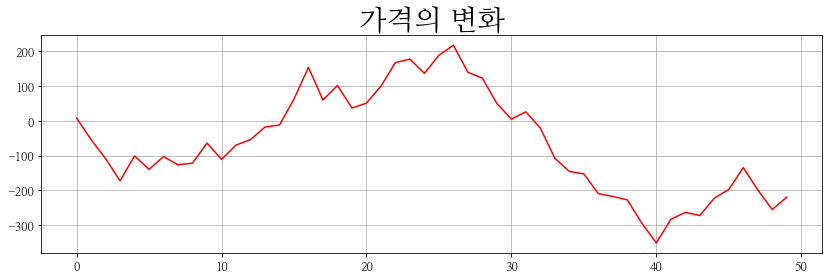

In [12]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 24.
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.labelsize'] = 20.

plt.title('가격의 변화')
plt.plot(range(50), prices, 'r')
plt.show()

레이블에 '-'가 있는 경우 유니코드의 '-'문자를 그대로 출력하면 '-' 부호만 깨져 보인다. 이를 방지하기 위해 'axes.unicode_minus' 옵션을 False로 지정한다.

### TTF 파일에서 font.family 이름 얻어 전역 설정
"font.family"에 지정할 이름을 .ttf 파일로 부터 얻을 수 있다

In [13]:
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

print(font_family)

NanumGothic


In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/NanumGothic.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()

plt.rcParams["font.family"] = font_family

## 사용법 2: FontProperties 객체 사용

한글 표현을 사용하는 그래프에서만 사용한다.

```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
fp = fm.FontProperties(fname=path, size=18)

prices = np.random.randn(100).cumsum()

plt.plot(prices, '-')
plt.title('가격추이', fontproperties=fp)
plt.xlabel('일자', fontproperties=fp)
plt.ylabel('가격', fontproperties=fp)
```



In [39]:
prices = np.random.normal(30, 3, 50)

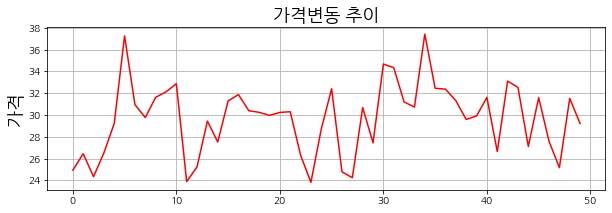

In [40]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# font_path = 'C:/Windows/Fonts/malgun.ttf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)

plt.ylabel('가격', fontproperties=fontprop)
plt.title('가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), prices, 'r')
plt.show()

### 폰트를 각기 지정해서 사용하기

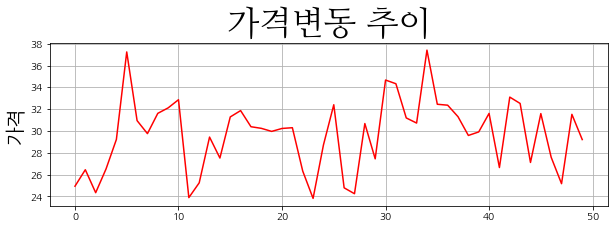

In [42]:
# path_gothic = 'C:/Windows/Fonts/malgun.ttf'
path_gothic = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop1 = fm.FontProperties(fname=path_gothic, size=20)

path_mj = "/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf"
fontprop2 = fm.FontProperties(fname=path_mj, size=34)

plt.plot(range(50), prices, 'r')
plt.ylabel('가격', fontproperties=fontprop1)
plt.title('가격변동 추이', fontproperties=fontprop2)
plt.show()